In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

C:\Users\JOSHWIN ISAC\AppData\Local\Temp\ipykernel_3136\3091600690.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import os
import cv2
path='D:/dataset for lab programs/archive/raw-img'
classes= sorted(os.listdir(path))

# Count the number of classes
num_classes = len(classes)

# Print the class names and the total number of classes
print("Class Names: \n", classes)
print("Number of Classes:", num_classes)


Class Names: 
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


In [3]:
# Get the number of samples in each class
# Initialize an empty dictionary to store the count of samples in each class
class_counts = []

# Iterate through each class and count the number of samples
for class_name in classes:
    class_path = os.path.join(path, class_name)
    num_samples = len(os.listdir(class_path))
    class_counts.append(num_samples)

print("Class Names: \n", classes)
print("Number of Classes:", len(classes))

Class Names: 
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


In [4]:
class_name_size = dict(zip(classes, class_counts))
class_name_size

{'cane': 4863,
 'cavallo': 2623,
 'elefante': 1446,
 'farfalla': 2112,
 'gallina': 3098,
 'gatto': 1668,
 'mucca': 1866,
 'pecora': 1820,
 'ragno': 4821,
 'scoiattolo': 1862}

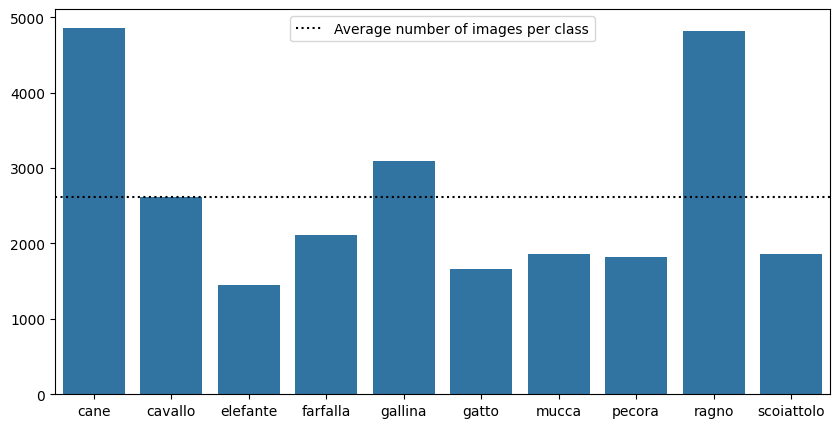

In [5]:
import seaborn as sn 
# Create the bar plot
plt.figure(figsize=(10, 5))
sn.barplot(x=classes, y=class_counts)

# Add a horizontal line to show the mean number of images across all classes
plt.axhline(np.mean(class_counts), color='black', linestyle=':', label="Average number of images per class")

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
import numpy as np

# Load images and preprocessing
images = []
labels = []
img_width, img_height = 100, 100  # Define the image dimensions

# Iterate through the class folders
for class_folder in os.listdir(path):
    class_path = os.path.join(path, class_folder)
    for img_file in os.listdir(class_path):
        img = cv2.imread(os.path.join(class_path, img_file))
        img = cv2.resize(img, (img_width, img_height))
        img = img.astype('float32') / 255  # Apply normalization
        images.append(img)
        labels.append(classes.index(class_folder))  # Assign labels based on the class index

# Convert to numpy array
X = np.array(images)
y = np.array(labels)

# Partition the dataset into training, validation, and test sets
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)


In [ ]:
# Create the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # Output layer with softmax activation
])

# Add batch normalization layers
model.add(BatchNormalization())

c:\Users\JOSHWIN ISAC\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(
